In [1]:
import pandas as pd
import sklearn as scikit
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Initialize data to be from the excel sheet
file_name = "default of credit card clients.xls"
raw_data = pd.read_excel(file_name)

In [3]:
print(raw_data)

      Unnamed: 0         X1   X2         X3        X4   X5     X6     X7  \
0             ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2   
1              1      20000    2          2         1   24      2      2   
2              2     120000    2          2         2   26     -1      2   
3              3      90000    2          2         2   34      0      0   
4              4      50000    2          2         1   37      0      0   
...          ...        ...  ...        ...       ...  ...    ...    ...   
29996      29996     220000    1          3         1   39      0      0   
29997      29997     150000    1          3         2   43     -1     -1   
29998      29998      30000    1          2         2   37      4      3   
29999      29999      80000    1          3         1   41      1     -1   
30000      30000      50000    1          2         1   46      0      0   

          X8     X9  ...        X15        X16        X17       X18       X19  \
0     

NOTE: Our original data has the labels underneath arbitrary x1,x2,...xn labels. We will omit fix the formate of the dataframe first to have the proper labels in the dataframe.

In [4]:
# Format of data frame is configured incorrectly. We will fix format here...
# Fixing the dataframes labels...
raw_data.columns = raw_data.iloc[0]
# Removing labels from being within the dataframe...
raw_data = raw_data.iloc[1:,:]
#Removing first column ID from within the dataframe as not relevent to our models
raw_data = raw_data.iloc[:,1:]


raw_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now with our data initialized, lets take a moment to explore the distribution of our classes

In [5]:
# Define a function to plot the distribution of a column
def plot_distribution(df, column):
    # Get the number of unique values in the column
    num_unique_values = df[column].nunique()
    df[column].hist(bins=num_unique_values, figsize=(10,5))
    plt.xlabel(column)
    plt.ylabel('Number of people')
    plt.title(f'Distribution of {column}')
    plt.show()

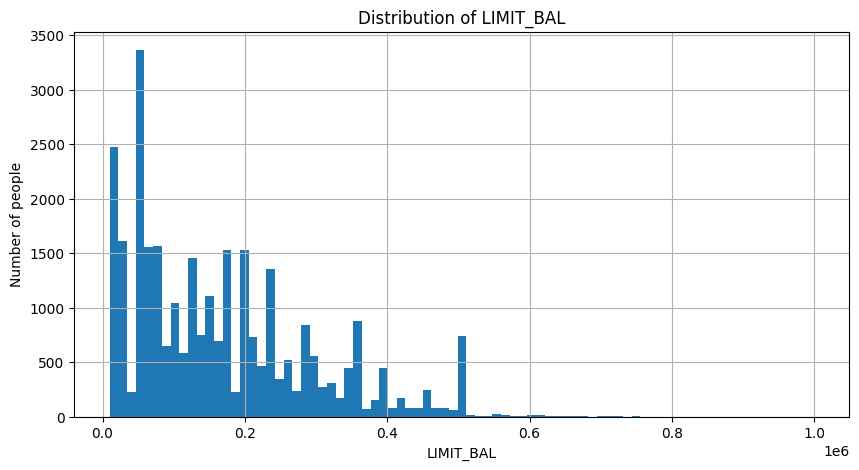

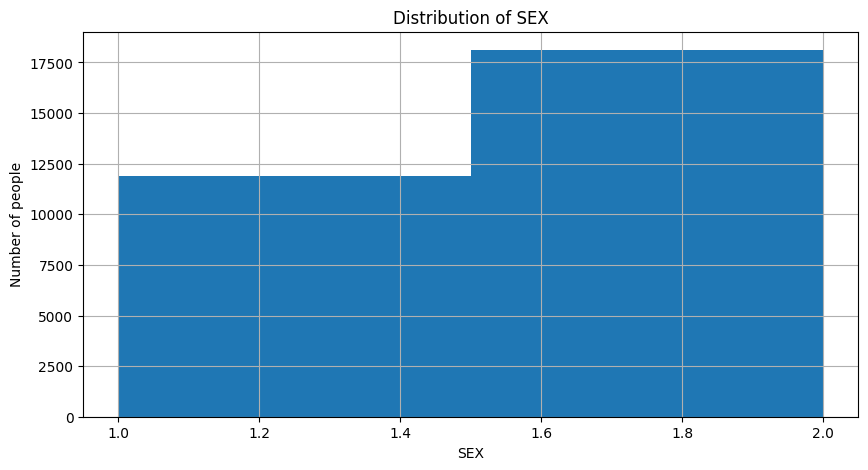

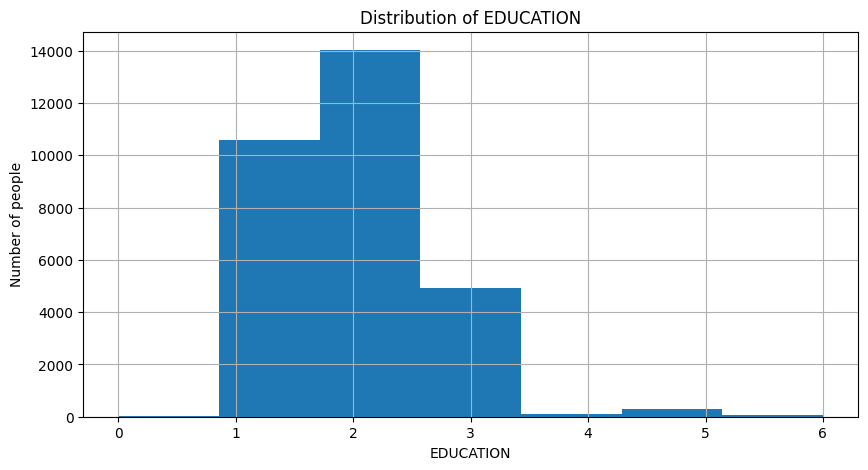

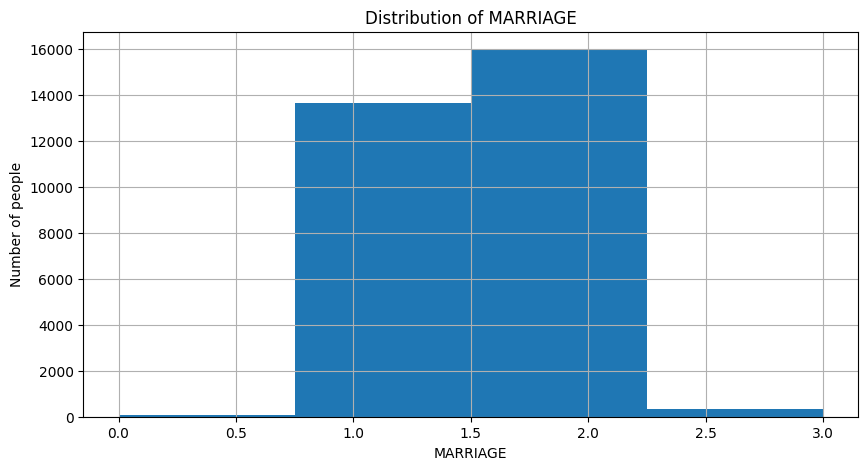

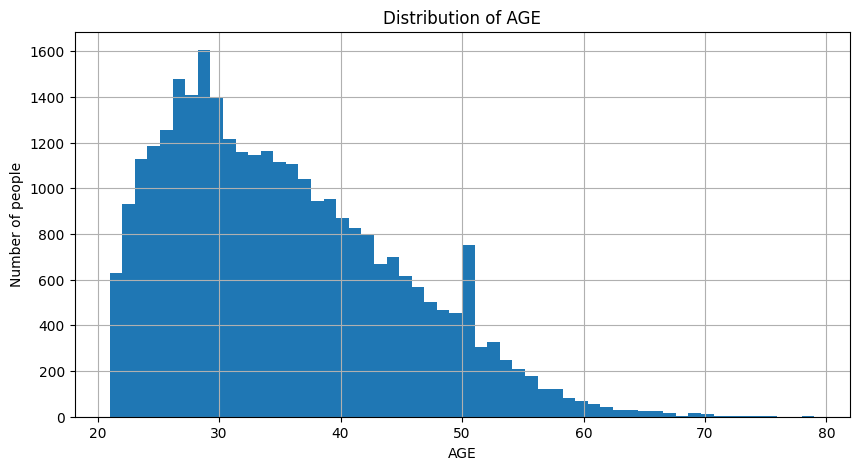

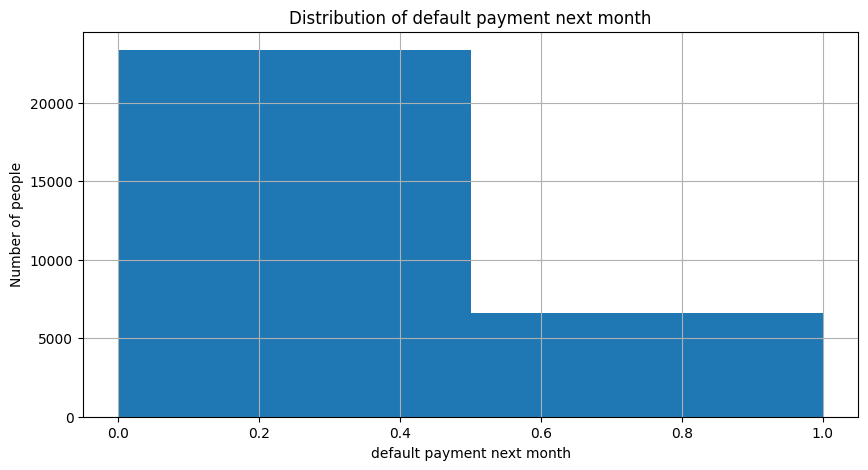

In [6]:
plot_distribution(raw_data, 'LIMIT_BAL') # limit_balance
plot_distribution(raw_data, 'SEX') # sex
plot_distribution(raw_data, 'EDUCATION') # Education
plot_distribution(raw_data, 'MARRIAGE') # Marriage
plot_distribution(raw_data, 'AGE') # Age
plot_distribution(raw_data, 'default payment next month') #default

There happens to be a few items that are not defined int he dataset and therefore will be removed.

In [7]:
data = raw_data[raw_data['MARRIAGE'] != 0]
data = data[data['EDUCATION'] < 4]
data = data[data['EDUCATION'] != 0]

NOTE: After removal, we see that we lost 522 points, a 0.01% loss of our data. This loss of information may help with fitting of our models since the data is more "correct" now. Distribution is not affected and therefore, the process remains valid

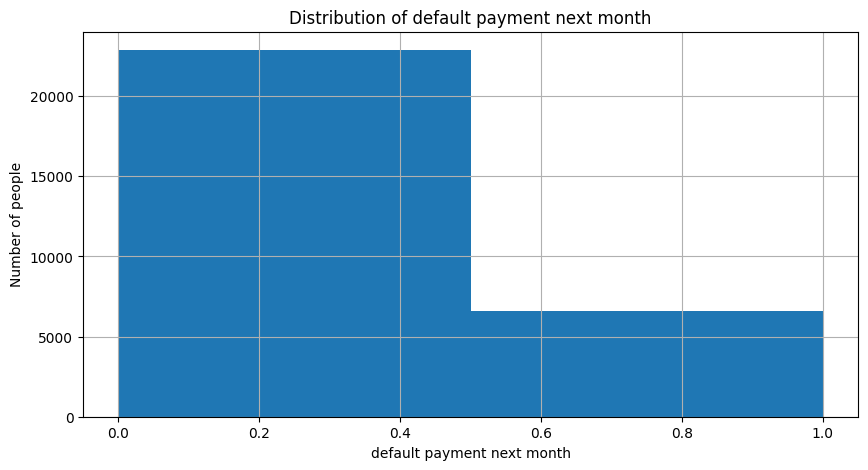

In [8]:
plot_distribution(data, 'default payment next month')

We can see that our data is imbalanced and has a skewed nature to it. We should try different methods to get a better representation to work on. However, for now let us work with the entire data frame to gain a reference.

Let us do simple preprocessing to get our split datasets ready.

In [9]:
from sklearn.model_selection import train_test_split

# Assuming raw_data is your DataFrame and `defalut payment next month` is the target variable
X = data.drop('default payment next month', axis=1)
y = data['default payment next month']

# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Split the training set into demographic and time series data
X_demographic_train = X_train[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_train = X_train.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train = X_time_series_train.values.reshape(-1,3,6)



# Do the same for the validation set
X_demographic_val = X_val[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_val = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val = X_time_series_val.values.reshape(-1,3,6)

# And the test set
X_demographic_test = X_test[['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]
X_time_series_test = X_test.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test = X_time_series_test.values.reshape(-1, 3, 6)

In [10]:
# Convert the frame to float32 to work with neural networks
X_time_series_train = X_time_series_train.astype('float32')
X_demographic_train = X_demographic_train.astype('float32')
X_time_series_val = X_time_series_val.astype('float32')
X_demographic_val = X_demographic_val.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

X_time_series_test = X_time_series_test.astype('float32')
X_demographic_test = X_demographic_test.astype('float32')
y_test = y_test.astype('float32')


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
import random as rn

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(0)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
rn.seed(0)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(0)


In [12]:
# Define the model: This will be LSTM using all data...
model = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model.add(LSTM(units=50, dropout=0.2, input_shape=(3,6)))

# Add Dense layer for demographic data
model.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7611 - loss: 0.5459 - val_accuracy: 0.7743 - val_loss: 0.5171
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7861 - loss: 0.4994 - val_accuracy: 0.7822 - val_loss: 0.4817
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7915 - loss: 0.4688 - val_accuracy: 0.7926 - val_loss: 0.4706
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8055 - loss: 0.4566 - val_accuracy: 0.7948 - val_loss: 0.4648
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8100 - loss: 0.4499 - val_accuracy: 0.7972 - val_loss: 0.4655
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8091 - loss: 0.4500 - val_accuracy: 0.7977 - val_loss: 0.4643
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8116 - loss: 0.4502 - val_accuracy: 0.8000 - val_loss: 0.4632
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8116 - loss: 0.4505 - val_accuracy: 0.8014 - val_

In [13]:
# Define the model: This will be RNN using all data...
model2 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model2.add(SimpleRNN(units=50, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for demographic data
model2.add(Dense(units=X_demographic_train.shape[1]))

# Add final Dense layer for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model2.fit([X_time_series_train, X_demographic_train], y_train, validation_data=([X_time_series_val, X_demographic_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6619 - loss: 0.7588 - val_accuracy: 0.7736 - val_loss: 0.5510
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.7857 - loss: 0.5255 - val_accuracy: 0.7739 - val_loss: 0.5401
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step - accuracy: 0.7863 - loss: 0.5178 - val_accuracy: 0.7739 - val_loss: 0.5383
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.7859 - loss: 0.5198 - val_accuracy: 0.7737 - val_loss: 0.5366
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step - accuracy: 0.7859 - loss: 0.5193 - val_accuracy: 0.7744 - val_loss: 0.5351
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - accuracy: 0.7854 - loss: 0.5170 - val_accuracy: 0.7741 - val_loss: 0.5350
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7858 - loss: 0.5183 - val_accuracy: 0.7743 - val_loss: 0.5335
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7861 - loss: 0.5178 - val_accuracy: 0.7

In [14]:
# Define the model: This will be LSTM using time-series only...
model3 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model3.add(LSTM(units=50, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model3.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6303 - loss: 0.6484 - val_accuracy: 0.7763 - val_loss: 0.4972
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7906 - loss: 0.4740 - val_accuracy: 0.7948 - val_loss: 0.4735
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8078 - loss: 0.4577 - val_accuracy: 0.7961 - val_loss: 0.4713
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8097 - loss: 0.4574 - val_accuracy: 0.7988 - val_loss: 0.4679
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8173 - loss: 0.4499 - val_accuracy: 0.8022 - val_loss: 0.4649
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.4501 - val_accuracy: 0.8024 - val_loss: 0.4630
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8201 - loss: 0.4476 - val_accuracy: 0.8027 - val_loss: 0.4604
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8177 - loss: 0.4471 - val_accuracy: 0.8041 - val_

In [15]:
# Define the model: This will be RNN using time-series only...
model4 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model4.add(SimpleRNN(units=50, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model4.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7321 - loss: 0.5805 - val_accuracy: 0.7741 - val_loss: 0.5445
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7838 - loss: 0.5313 - val_accuracy: 0.7739 - val_loss: 0.5351
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7847 - loss: 0.5256 - val_accuracy: 0.7737 - val_loss: 0.5329
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7856 - loss: 0.5226 - val_accuracy: 0.7741 - val_loss: 0.5331
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7855 - loss: 0.5217 - val_accuracy: 0.7737 - val_loss: 0.5318
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.7859 - loss: 0.5193 - val_accuracy: 0.7739 - val_loss: 0.5314
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7861 - loss: 0.5191 - val_accuracy: 0.7743 - val_loss: 0.5301
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7861 - loss: 0.5169 - val_accuracy: 

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score #will be used to printInfo of models

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def printInfo(model):
    # Use the model to make predictions
    y_pred_prob = model.predict(X_time_series_test)

    # Apply a threshold to get strict 0 or 1 values
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Now compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = np.mean([cm[i,i]/(np.sum(cm[:,i])) for i in range(cm.shape[0])])

    # Print the metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Specificity: {specificity}")

    # Draw the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8202170963364993
Precision: 0.6641123882503193
Recall: 0.39483675018982534
Specificity: 0.7541176062119971


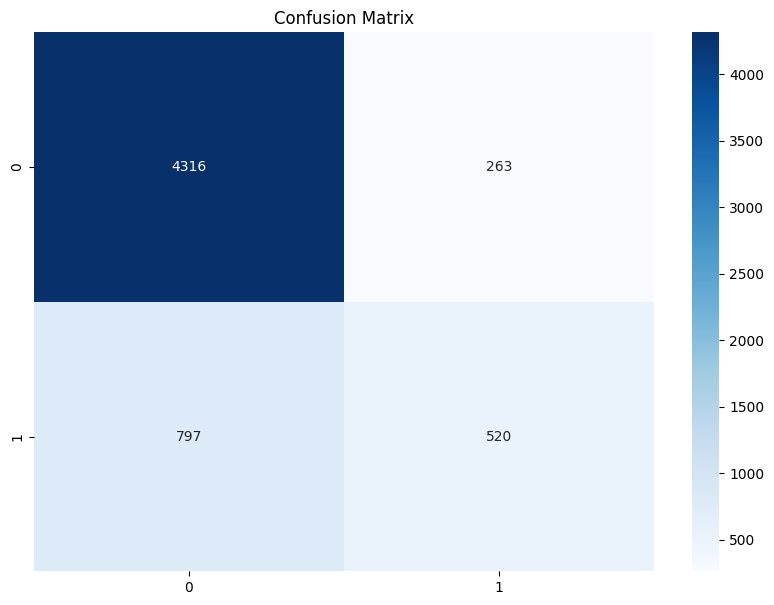

In [18]:
printInfo(model)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7790027137042063
Precision: 0.6944444444444444
Recall: 0.018982536066818528
Specificity: 0.7369833143723928


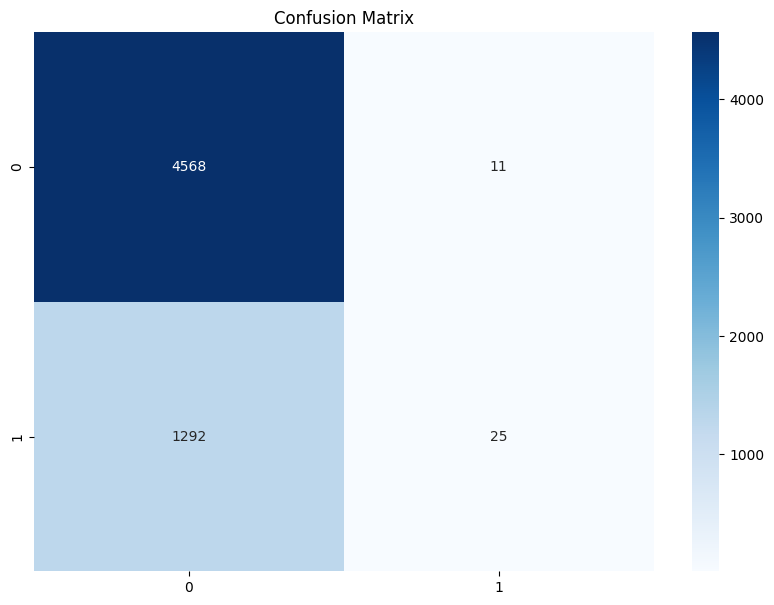

In [19]:
printInfo(model2)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.817842605156038
Precision: 0.6784140969162996
Recall: 0.35079726651480636
Specificity: 0.757231976550192


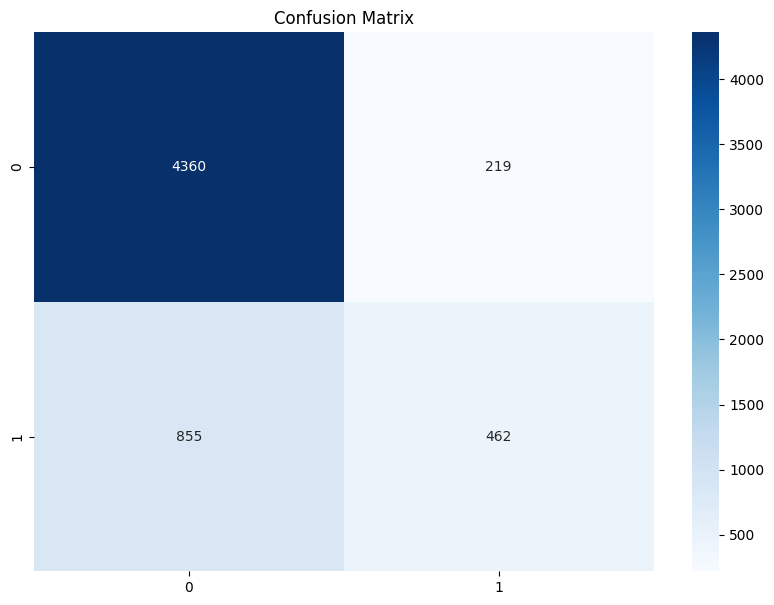

In [20]:
printInfo(model3)

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.7790027137042063
Precision: 0.7058823529411765
Recall: 0.018223234624145785
Specificity: 0.7426545848636281


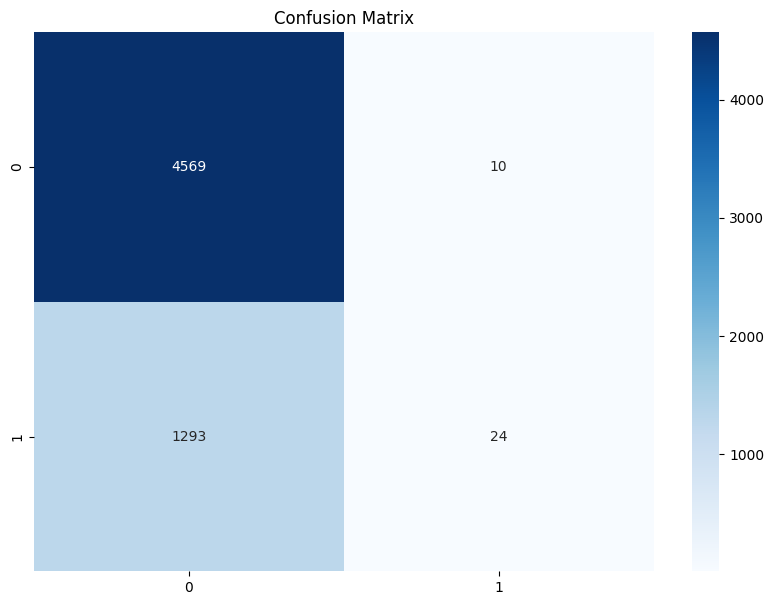

In [21]:
printInfo(model4)

# Let us try to get a good model based on relevent data only (i.e only time series)

Let us try to make the model more "focused" Lets have layers that look at the one-to-one relation prior to applying a relation overall datapoints.

In [22]:
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras_self_attention import SeqWeightedAttention
from keras.regularizers import l2

# Define the model
attentionLSTM = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM.add(LSTM(units=36, dropout=0.2, return_sequences=True, input_shape=(3, 6), kernel_regularizer=l2(0.03)))

# Add second LSTM layer
attentionLSTM.add(LSTM(units=18, dropout=0.2, return_sequences=True, kernel_regularizer=l2(0.03)))

# Add attention layer
attentionLSTM.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM.fit(X_time_series_train, y_train, validation_data=(X_time_series_val, y_val), batch_size=256, epochs=25)


Epoch 1/25


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6277 - loss: 2.0850 - val_accuracy: 0.7702 - val_loss: 1.2717
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7830 - loss: 1.1139 - val_accuracy: 0.7702 - val_loss: 0.7935
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7830 - loss: 0.7282 - val_accuracy: 0.7702 - val_loss: 0.6313
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7830 - loss: 0.5972 - val_accuracy: 0.7702 - val_loss: 0.5688
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7843 - loss: 0.5466 - val_accuracy: 0.7710 - val_loss: 0.5476
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7878 - loss: 0.5309 - val_accuracy: 0.7739 - val_loss: 0.5367
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7908 - loss: 0.5210 - val_accuracy: 0.7770 - val_loss: 0.5268
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.5114 - val_accuracy: 0.7780 - val_loss: 0.5219
Epo

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8147896879240163
Precision: 0.6963350785340314
Recall: 0.30296127562642367
Specificity: 0.7619379694755448


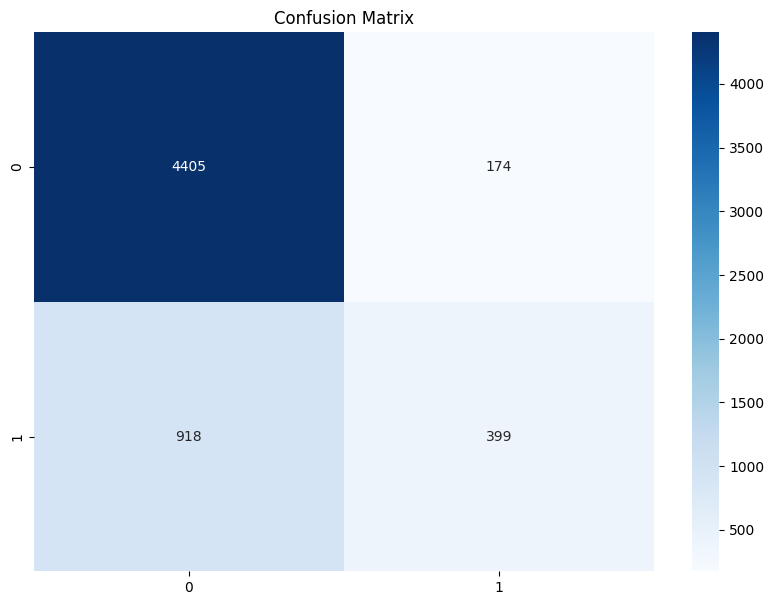

In [23]:
printInfo(attentionLSTM)

Lets try some further preprocessing to potentially improve our results...

In [24]:
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss

y = y.astype('int')

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply NearMiss undersampling
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X_scaled, y)

# convert numpy arrays to pandas dataframe
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled)


In [25]:
X_resampled

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1.482447,-1.232325,0.277542,-1.071945,0.708425,0.900843,-1.559287,-1.532082,-1.521464,-1.529242,...,-0.677217,-0.671717,-0.663046,-0.653119,-0.340591,-0.254928,-0.295459,-0.306874,-0.314159,-0.293220
1,1.482447,0.811474,-1.155776,-1.071945,0.057420,-1.767290,-1.559287,-1.532082,-1.521464,-1.529242,...,-0.677217,-0.671717,-0.663046,-0.653119,-0.340591,-0.254928,-0.295459,-0.306874,-0.314159,-0.293220
2,-0.364148,0.811474,0.277542,0.858578,-0.810588,0.900843,-1.559287,-1.532082,-1.521464,-1.529242,...,-0.677217,-0.671717,-0.663046,-0.653119,-0.340591,-0.254928,-0.295459,-0.306874,-0.314159,-0.293220
3,-1.133563,-1.232325,0.277542,0.858578,0.382922,0.011465,0.107186,0.134070,0.184043,0.230350,...,-0.442980,-0.414599,-0.385425,-0.364354,-0.264762,-0.199979,-0.261739,-0.267970,-0.273824,-0.257197
4,-0.287207,0.811474,0.277542,0.858578,-0.919089,0.900843,-1.559287,-1.532082,-1.521464,-1.529242,...,-0.677217,-0.671717,-0.663046,-0.653119,-0.340591,-0.254928,-0.295459,-0.306874,-0.314159,-0.293220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13191,0.328325,-1.232325,0.277542,-1.071945,-0.159582,2.679598,1.773659,1.800222,1.889550,1.989942,...,-0.641049,-0.632788,-0.621876,-0.611130,-0.340591,-0.254928,-0.295459,-0.306874,-0.314159,-0.293220
13192,-0.671914,-1.232325,0.277542,0.858578,-0.159582,1.790220,1.773659,1.800222,1.889550,1.989942,...,0.471240,0.535376,0.697342,0.709972,0.081351,-0.103495,-0.295459,0.138100,-0.314159,-0.067017
13193,-1.056621,-1.232325,0.277542,0.858578,0.165921,3.568975,2.606895,1.800222,-0.668711,0.230350,...,-0.637316,-0.346614,-0.324098,-0.328008,-0.340591,-0.254928,0.959768,-0.039889,-0.182987,-0.117912
13194,-0.671914,-1.232325,1.710859,-1.071945,0.599924,0.900843,-0.726050,0.134070,0.184043,0.230350,...,0.426681,0.150057,-0.467816,0.168921,4.837244,-0.107432,-0.228247,-0.184442,3.159530,-0.191202


<Axes: >

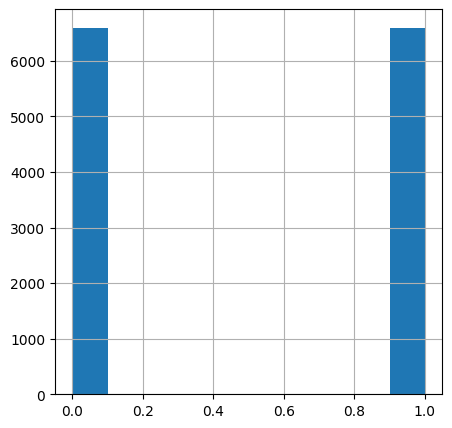

In [26]:
y_resampled.hist(figsize=(5,5))

Note: we have X_resampled and y_resampled and we need to split these into train/test sets again....

This time around however, we will only extract the time series data

In [27]:
# Split the data into training, validation, and test sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=0) # 0.25 x 0.8 = 0.2

# Split the training set to time series data
X_time_series_train = X_train.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)

# Reshape time series training data to be 3D for the LSTM (samples, timesteps, features)
X_time_series_train = X_time_series_train.values.reshape(-1,3,6)

# Do the same for the validation set
X_time_series_val = X_val.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_val = X_time_series_val.values.reshape(-1,3,6)

# And the test set
X_time_series_test = X_test.drop(['LIMIT_BAL','SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis=1)
X_time_series_test = X_time_series_test.values.reshape(-1,3,6)


# Convert the frames to float32 to work with neural networks
X_time_series_train = X_time_series_train.astype('float32')
X_time_series_val = X_time_series_val.astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

X_time_series_test = X_time_series_test.astype('float32')
y_test = y_test.astype('float32')


In [28]:
#REPEAT OUR STRUCUTRE OF BEST MODEL SO FAR ON THIS NEW DATASET
# Define the model
attentionLSTM_s = Sequential()

# Add first LSTM layer with return_sequences=True
attentionLSTM_s.add(LSTM(units=36, dropout=0.2, return_sequences=True, input_shape=(3,6)))

# Add second LSTM layer
attentionLSTM_s.add(LSTM(units=18, dropout=0.2, return_sequences=True))

# Add attention layer
attentionLSTM_s.add(SeqWeightedAttention())

# Add Dropout layer
attentionLSTM_s.add(Dropout(0.1))

# Add Dense layer for binary classification
attentionLSTM_s.add(Dense(1, activation='sigmoid'))

# Compile the model
attentionLSTM_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
attentionLSTM_s.fit(X_time_series_train, y_train, validation_data=(X_time_series_val, y_val), batch_size=128, epochs=10)


Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7137 - loss: 0.6274 - val_accuracy: 0.7873 - val_loss: 0.4880
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4692 - val_accuracy: 0.7992 - val_loss: 0.4667
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8099 - loss: 0.4545 - val_accuracy: 0.7988 - val_loss: 0.4641
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8119 - loss: 0.4513 - val_accuracy: 0.8012 - val_loss: 0.4613
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.4507 - val_accuracy: 0.8004 - val_loss: 0.4612
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8156 - loss: 0.4488 - val_accuracy: 0.8029 - val_loss: 0.4601
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.4497 - val_accuracy: 0.8017 - val_loss: 0.4605
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8180 - loss: 0.4433 - val_accuracy: 0.8007 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8183514246947082
Precision: 0.6694214876033058
Recall: 0.3690205011389522
Specificity: 0.7543432389660629


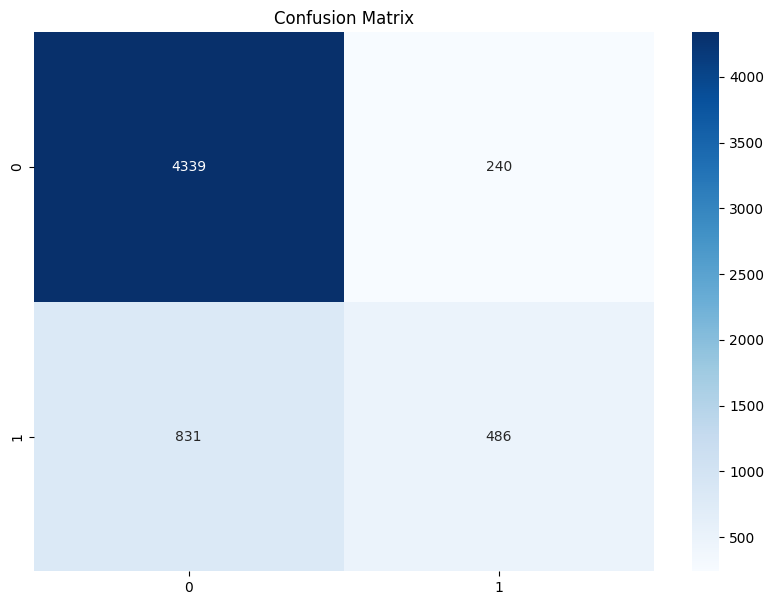

In [29]:
printInfo(attentionLSTM_s)

In [30]:
# Define the model: This will be LSTM using time-series only...
model5 = Sequential()

# Add LSTM layer
# Adjust the units and dropout according to your data
model5.add(LSTM(units=50, dropout=0.2, input_shape=(3, 6)))

# Add Dense layer for binary classification
model5.add(Dense(1, activation='sigmoid'))

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# Adjust the batch size and epochs according to your data
model5.fit([X_time_series_train], y_train, validation_data=([X_time_series_val], y_val), batch_size=32, epochs=10)

Epoch 1/10


C:\Users\godha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


553/553 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6802 - loss: 0.5961 - val_accuracy: 0.7732 - val_loss: 0.5013
Epoch 2/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7895 - loss: 0.4779 - val_accuracy: 0.7875 - val_loss: 0.4742
Epoch 3/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7992 - loss: 0.4602 - val_accuracy: 0.7946 - val_loss: 0.4708
Epoch 4/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8053 - loss: 0.4533 - val_accuracy: 0.7973 - val_loss: 0.4680
Epoch 5/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8128 - loss: 0.4483 - val_accuracy: 0.7987 - val_loss: 0.4652
Epoch 6/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8132 - loss: 0.4470 - val_accuracy: 0.7997 - val_loss: 0.4659
Epoch 7/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8156 - loss: 0.4459 - val_accuracy: 0.7978 - val_loss: 0.4646
Epoch 8/10
553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8144 - loss: 0.4479 - val_accuracy: 0.7992 - val_

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.8175033921302578
Precision: 0.672883787661406
Recall: 0.3561123766135156
Specificity: 0.754887748802813


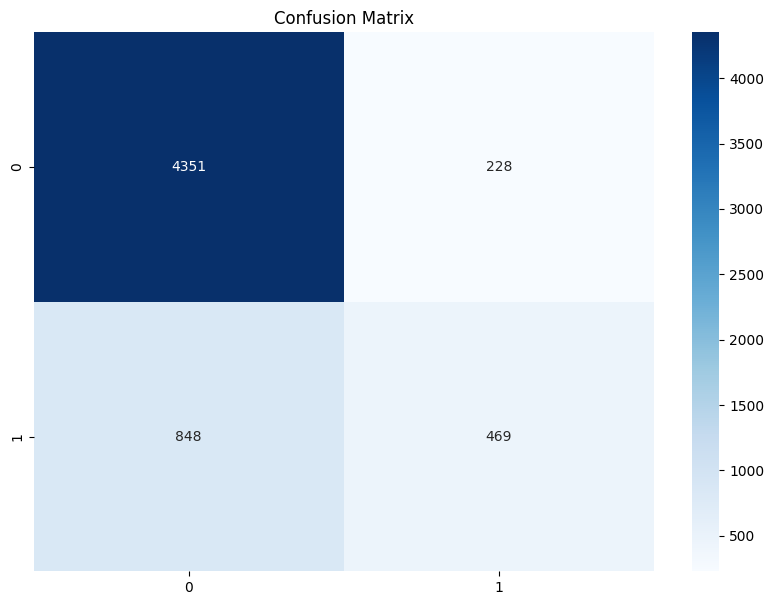

In [31]:
printInfo(model5)